In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})

import warnings
warnings.filterwarnings('ignore')

### How good is your model
#### Classification metrics
- Measuring model performance with accuracy:
 - Fraction of correctly classified samples
 - Not always a useful metric

#### Class imbalance examples: Emails
- Spam classification 
 - 99% of emails are real; 1% of emails are spam
- Could build a classifier that predicts ALL emails as real
 - 99% accurate!!
 - But horrible at actually classifying spam
 - Fails at its original purpose
- Needs more nuanced metrics

#### Diagosing classification predictions
- Confusion matrix

|          |    Predicted: Spam Email|    Predicted: Real Email|
| ---- | ---- | ---- |
|Actual: Spam Email|True Positive|False Negative|
|Actual: Real Email|False Positive|True Negative|

### Metrics from the confusion matrix
- Precision: $\displaystyle\frac{tp}{tp+fp}$
<br>
- Recall: $\displaystyle\frac{tp}{tp+fn}$
<br> 
- F1 score:$\displaystyle2*\frac{precision~*~recall}{precision~+~recall}$
 - The harmonic mean of precision and recall
- High precision: Not many real emails predicted as spam
- High recall: Predicted most spam emails correctly 

In [2]:
columns = ['party', 'infants', 'water', 'budget','physician', 'salvador', 'religious', 
          'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund',
          'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('house-votes-84.csv', names=columns)
df = df.replace('?', np.nan)
df = df.fillna(method='bfill')
df.iloc[434,15] = 'n'
df = df.replace({'n': 0, 'y':1})
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
def auto(): 
    print('X_train, X_test, y_train, y_test = train_test_split()')

In [4]:
auto()

X_train, X_test, y_train, y_test = train_test_split()


In [5]:
y = df['party'].values
X = df.drop('party', axis=1).values

In [6]:
knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [7]:
print(confusion_matrix(y_test, y_pred))

[[107   8]
 [  5  54]]


In [8]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.96      0.93      0.94       115
 republican       0.87      0.92      0.89        59

avg / total       0.93      0.93      0.93       174



In [9]:
df = pd.read_csv('diabetes.csv')
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = df.drop('diabetes', axis=1).values
y = df['diabetes'].values

In [11]:
# Import necessary modules
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



### Logistic Regression and the ROC curve
#### Logistic Regression for binary classification 
- Logistic regression outputs probabilities
- If the probability 'p' is greater than 0.5:
 - The data is labeled '1'
- If the probability 'p' is leass than 0.5:
 - The data is labeled '0'

In [12]:
auto()

X_train, X_test, y_train, y_test = train_test_split()


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7792207792207793

### Probability thresholds
- By default, logistic regression threshold =0.5
    - k-NN classifiers also have thresholds
- What happens if we vary the threshold?

<img src='ROC_curve.PNG' alt='ROC_curve' width='500'/>

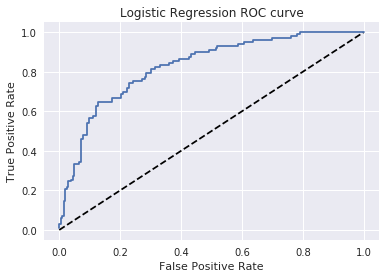

In [14]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show();

In [15]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



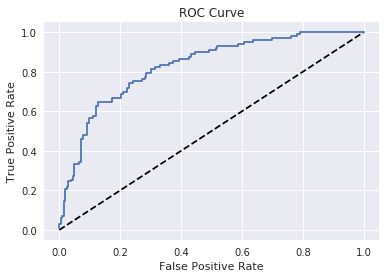

In [16]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Area under the ROC curve (AUC)
- Larger area under the ROC curve = better model 

In [17]:
auto()

X_train, X_test, y_train, y_test = train_test_split()


In [18]:
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.8268608414239483

### AUC using cross-validation

In [19]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print(cv_scores)

[0.79888889 0.80796296 0.81944444 0.86622642 0.85056604]


In [20]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8268608414239483
AUC scores computed using 5-fold cross-validation: [0.79888889 0.80796296 0.81944444 0.86622642 0.85056604]


### Hyperparameter tuning
- Linear regression: Choosing parameters 
- Ridge/lasso regression: choosing alpha
- k-Nearest Neighbors: Choosing n_neighbors
- Parameters like alpha and k: Hyperparameters
- Hyperparameters cannot be learned by fitting the model

### Choosing the correct hyperparameter
- Try a bunch of different hyperparameter values
- Fit all of them seperately 
- See how well each of them performs
- Choose the best performing one
- It is essential to use cross-validation

### Grid search cross-validation 

<img src='grid_search.png' alt='grid_search' width='500'/>

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
knn_cv.best_params_

{'n_neighbors': 14}

In [23]:
knn_cv.best_score_

0.7578125

In [24]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 163789.3706954068}
Best score is 0.7721354166666666


In [25]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.7291666666666666


### Hold-out set reasoning
- How well can the model perform on never before seen data?
- Using ALL data for cross-validation is not ideal
- Split data into training and hold-out set at the beginning
- Perform grid search cross-validation on training set
- Choose best hyperparameters and evaluate on hold-out set

In [26]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


In [27]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702687
Tuned ElasticNet MSE: 0.16664179543611013


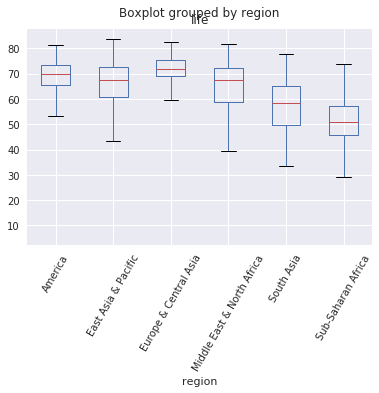

In [28]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'region', rot=60)

# Show the plot
plt.show()

In [29]:
df.drop('Country', axis=1, inplace=True)

In [30]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['Year', 'fertility', 'life', 'population', 'child_mortality', 'gdp',
       'region_America', 'region_East Asia & Pacific',
       'region_Europe & Central Asia', 'region_Middle East & North Africa',
       'region_South Asia', 'region_Sub-Saharan Africa'],
      dtype='object')
Index(['Year', 'fertility', 'life', 'population', 'child_mortality', 'gdp',
       'region_East Asia & Pacific', 'region_Europe & Central Asia',
       'region_Middle East & North Africa', 'region_South Asia',
       'region_Sub-Saharan Africa'],
      dtype='object')


In [31]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.26648172 0.23084647 0.27355543 0.24898795 0.25673452]


### Handling missing data

In [32]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


### Dropping missing data

In [35]:
#If it is only a few rows
#df = df.dropna()

### Imputing missing data
- Making an educated guess about the missing values
- Example: Using the mean of the non-missing entries

In [36]:
# from sklearn.preprocessing import Imputer
# imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
# imp.fit(X)
# X = imp.transform(X)

### Imputing within a pipeline

In [37]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [38]:
X = df.drop('diabetes', axis=1)
y = df.diabetes
X.shape, y.shape

((768, 8), (768,))

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

logreg = LogisticRegression()

steps =[('imputation', imp),
        ('logistic_regression', logreg)]

pipeline = Pipeline(steps)

X = df.drop('diabetes', axis=1)
y = df.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)

0.7619047619047619

In [40]:
cols = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [41]:
df = pd.read_csv('house-votes-84.csv', names=cols)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [42]:
# Convert '?' to NaN
df[df == "?"] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [43]:
cols = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [44]:
df = pd.read_csv('house-votes-84.csv', names=cols)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [45]:
df[df == 'n'] = 0
df[df == 'y'] = 1
df[df == '?'] = np.nan

In [46]:
y = df.party
X = df.drop('party', axis=1)
X[:3]

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0


In [47]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.99      0.96      0.98        85
 republican       0.94      0.98      0.96        46

avg / total       0.97      0.97      0.97       131



### Centering and scaling

In [48]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [49]:
X = df.drop('quality', axis=1)
y = df.quality

### Why scale your data?
- Many models use some form of distance to inform them. 
- Features on larger scales can unduly influence the model.
 - Example: k-NN uses distance explicitly when making predictions
- We want features to be on a similar scale
- Normalizing (or scaling or centering)

### Ways to normalize your data
- Standardization: Subtract the mean and divide by variance.
 - All features are centered around zero and have variance one.
- Can also subtract the minimum and divide by the range.
 - Minimum zero and maximum one.
- Can also normalized so the data ranges from -1 to +1.
- See scikit-learn docs for further details.

### Scaling in scikit-learn

In [50]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

np.mean(X), np.std(X)

(fixed acidity            8.319637
 volatile acidity         0.527821
 citric acid              0.270976
 residual sugar           2.538806
 chlorides                0.087467
 free sulfur dioxide     15.874922
 total sulfur dioxide    46.467792
 density                  0.996747
 pH                       3.311113
 sulphates                0.658149
 alcohol                 10.422983
 dtype: float64, fixed acidity            1.740552
 volatile acidity         0.179004
 citric acid              0.194740
 residual sugar           1.409487
 chlorides                0.047051
 free sulfur dioxide     10.456886
 total sulfur dioxide    32.885037
 density                  0.001887
 pH                       0.154338
 sulphates                0.169454
 alcohol                  1.065334
 dtype: float64)

In [51]:
np.mean(X_scaled), np.std(X_scaled)

(2.546626531486538e-15, 1.0)

### Scaling in a pipeline

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy_score(y_test, y_pred)

0.615625

In [54]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

knn_scaled.score(X_test, y_test)

0.615625

In [64]:
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {'knn__n_neighbors':np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 1}
0.8010204081632653
             precision    recall  f1-score   support

          0       0.85      0.85      0.85       662
          1       0.70      0.69      0.69       318

avg / total       0.80      0.80      0.80       980



In [56]:
# df = pd.read_csv('white-wine.csv')
y = df['quality']
X = df.drop('quality', axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
y[y <= 5] = 1
y[y > 5] = 0

y[:5]

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [58]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
dtype: float64
Standard Deviation of Unscaled Features: fixed acidity            0.843782
volatile acidity         0.100784
citric acid              0.121007
residual sugar           5.071540
chlorides                0.021846
free sulfur dioxide     17.005401
total sulfur dioxide    42.493726
density                  0.002991
pH                       0.150985
sulphates                0.114114
alcohol                  1.230495
dtype: float64
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


In [59]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


In [62]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                   random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7795918367346939
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       662
          1       0.67      0.63      0.65       318

avg / total       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}
